## Majors, salaries, and genders

### 1.0 Introduction

This notebook is a visualization of the median salaries of recent graduates of about 170 majors, and the degree of women's participation in each of them. I want to plot the salaries and shares of women side by side to see if there's a larger participation of women in professions that earn less, and viceversa.

### 2.0 Reading the data

The dataset is available at FiveThirtyEight's [Github's repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). We start by loading the libraries we will be using and then read the data. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

Reading the data

In [2]:
major_earnings = pd.read_csv("recent-grads.csv")

This dataset corresponds to recent graduates of each profession, those aged 28 and younger. The dataset fields we are interested in are `Major_category`, `Major`, `Median` (the median salary), and `ShareWomen` (the fraction of women among that major's recent graduates).

#### 2.1 Computing the percentage of women in each major

We are given the fraction of women in each major, `ShareWomen`, but we will use the percentage of women in our plots.

In [3]:
# Convert fraction ShareWomen to percent
major_earnings["PctWomen"] = major_earnings["ShareWomen"].apply(lambda x: 100 * x) 

#### 2.2 Listing the number of majors in each major category

We can print the number of majors in each category.

In [4]:
major_categories = major_earnings["Major_category"].unique().tolist()
for major_cat in major_categories:
    print(major_cat, "majors:", major_earnings[major_earnings["Major_category"] == major_cat].shape[0])

Engineering majors: 29
Business majors: 13
Physical Sciences majors: 10
Law & Public Policy majors: 5
Computers & Mathematics majors: 11
Agriculture & Natural Resources majors: 10
Industrial Arts & Consumer Services majors: 7
Arts majors: 8
Health majors: 12
Social Science majors: 9
Biology & Life Science majors: 14
Education majors: 16
Humanities & Liberal Arts majors: 15
Psychology & Social Work majors: 9
Communications & Journalism majors: 4
Interdisciplinary majors: 1


There are about 170 majors in 15 categories, plus interdisciplinary majors. We will be creating "super" major categories in order to group the bar plots.

#### 2.3 A function that will be reused often

The following function will be called by all the plots.

In [5]:
def ax_settings(ax, ax2, major_df, plot_title, max_salary):
    '''
    Sets axis settings for all bar plots.
    ax, ax2: salary and % of women axes
    major_df: dataframe pertaining to a "Major_category"
    plot_title: desired title for bar plot
    max_salary: for the 'ax1' axis, the maximum salary
    '''
    rects = [] # bars for salary axis
    rects2 = [] # bars for % of women axis
    major_df.set_index("Major", inplace = True) # index df by "Major" columns
    majors = major_df.index.tolist()
    idx = 0
    # Drawing the bars one at a time
    for major in majors:
        rects.append(ax.bar(x = idx, height = major_df.loc[major, "Median"], width =  0.5))
        rects2.append(ax2.bar(x = idx + 0.5, height = major_df.loc[major, "PctWomen"], width =  0.5, color = "0.75", 
                              hatch="//"))
        idx += 2
    
    # Making spines and ticks invisible for both ax and ax2
    for key,spine in ax.spines.items():
        spine.set_visible(False)

    ax.tick_params(bottom="off", top="off", left="off", right="off")

    ax.tick_params(labelbottom='off')

    for key,spine in ax2.spines.items():
        spine.set_visible(False)

    ax2.tick_params(bottom="off", top="off", left="off", right="off")

    ax2.tick_params(labelbottom='off')
    
    # Shortening major names b/c some of them are *really long*
    
    majors_shortened = [major[:20] for major in majors]

    # Legends
    ax.legend(rects, majors_shortened, loc='lower center', bbox_to_anchor=(0.5, 1.05), frameon = False, ncol = 2)

    ax2.legend(["% of women in major"], frameon = False)
    
    ax.set_title(plot_title, fontsize = 14, fontweight = "bold")
    
    # Setting tick marks for both ax and ax2
    ax.set_yticks([0, int(max_salary/2), max_salary])
    vals = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
    
    ax2.set_yticks([0, 50, 100])
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:2.0f}%'.format(x) for x in vals])
    return (ax, ax2)

### 3.0 Visualizing the data

I will group several major categories into "super" major categories for the purposes of plotting.

#### 3.1 Liberal arts and humanities majors

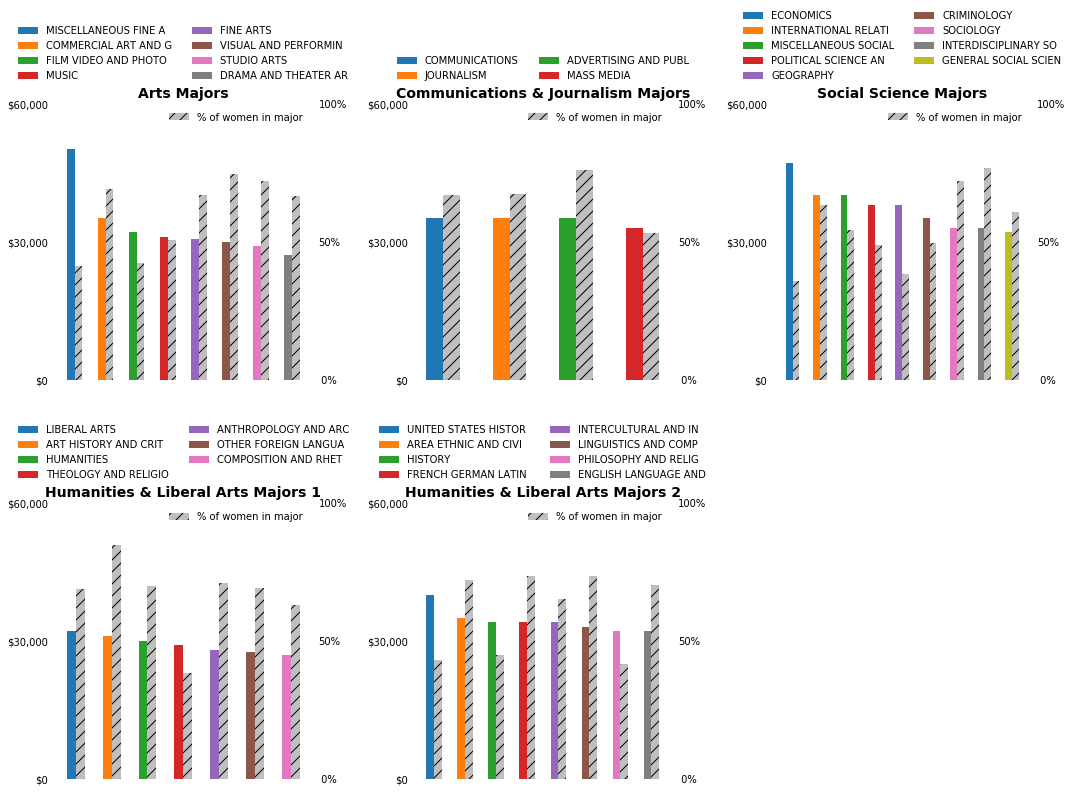

In [6]:
# Liberal arts majors except humanities
lib_arts_major_cats = ["Arts", "Communications & Journalism", "Social Science"]

fig = plt.figure(figsize=(15,10))

for sp in range(0, 3):
    ax = fig.add_subplot(2,3,sp+1)
    ax2 = ax.twinx()
    categ_majors = major_earnings[major_earnings["Major_category"] == lib_arts_major_cats[sp]]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors, lib_arts_major_cats[sp] + " Majors", 60000)
    
# Humanities majors

for sp in range(3, 5):
    ax = fig.add_subplot(2,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 4:
        categ_majors_hum = major_earnings[major_earnings["Major_category"] == "Humanities & Liberal Arts"][:8]
    else:
        categ_majors_hum = major_earnings[major_earnings["Major_category"] == "Humanities & Liberal Arts"][8:]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_hum, "Humanities & Liberal Arts Majors " + str(sp - 2), 60000)


fig.tight_layout(w_pad = 2.0, h_pad = 10.0)
plt.show()

Women appear to have achieved an adequate or even a high degree of representation in most liberal arts and humanities majors, with the exceptions of economics and geography. It may be worth noting that economics is the highest paid profession among the social science majors.

#### 3.2 STEM majors

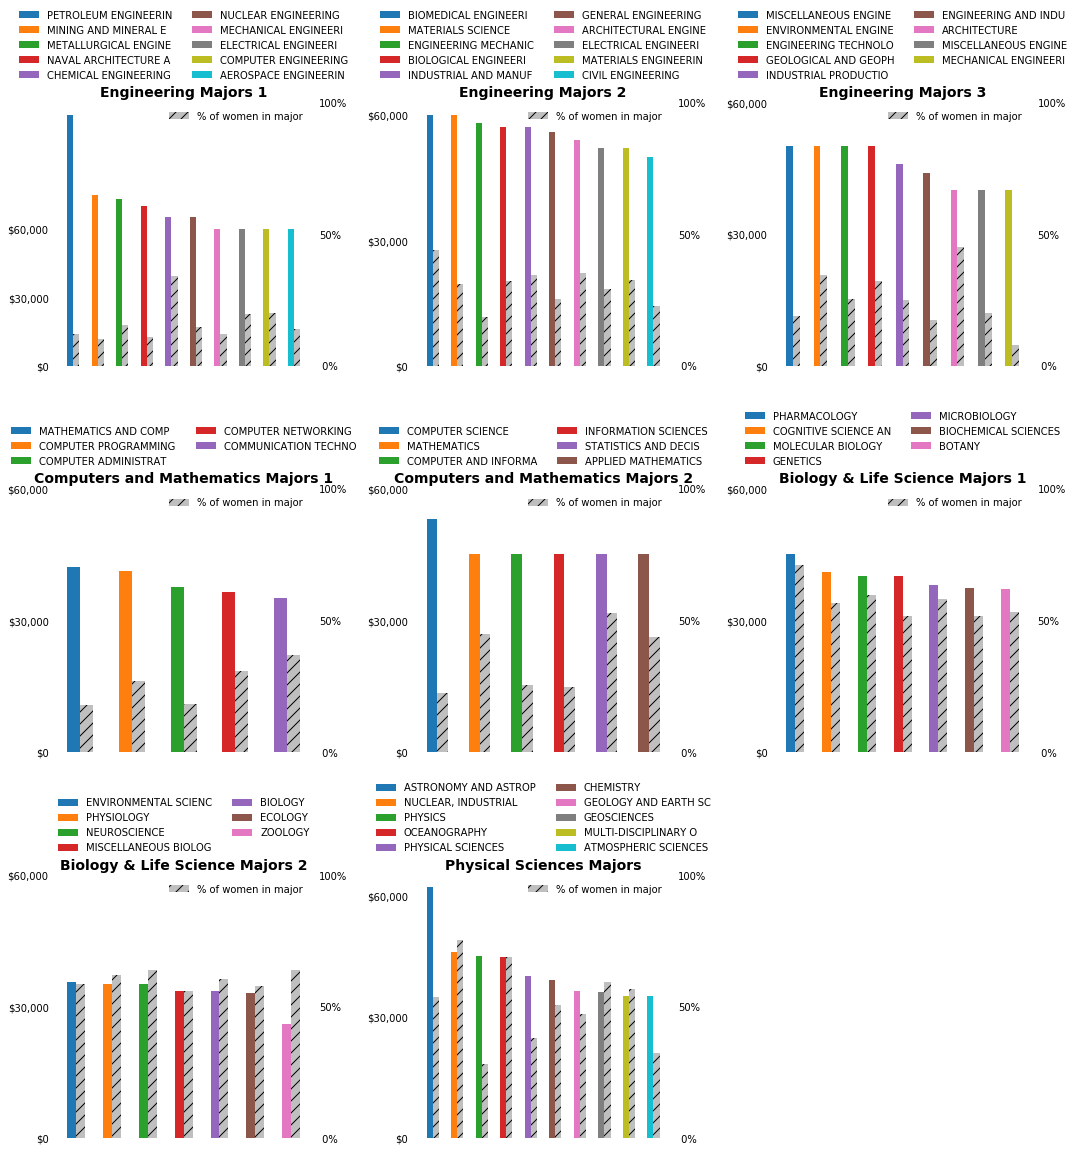

In [7]:
fig = plt.figure(figsize=(15,15))

# Engineering majors

for sp in range(0, 3):
    ax = fig.add_subplot(3,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 0:
        categ_majors_eng = major_earnings[major_earnings["Major_category"] == "Engineering"][:10]
    elif sp == 1:
        categ_majors_eng = major_earnings[major_earnings["Major_category"] == "Engineering"][10:20]
    else:
        categ_majors_eng = major_earnings[major_earnings["Major_category"] == "Engineering"][20:]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_eng, "Engineering Majors " + str(sp + 1), 60000)
    

# Computers and mathematics majors

for sp in range(3, 5):
    ax = fig.add_subplot(3,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 4:
        categ_majors_compsci = major_earnings[major_earnings["Major_category"] == "Computers & Mathematics"][:6]
    else:
        categ_majors_compsci = major_earnings[major_earnings["Major_category"] == "Computers & Mathematics"][6:]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_compsci, "Computers and Mathematics Majors " + str(sp - 2), 60000)
    
# Biology & Life Science majors

for sp in range(5, 7):
    ax = fig.add_subplot(3,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 5:
        categ_majors_biol = major_earnings[major_earnings["Major_category"] == "Biology & Life Science"][:7]
    else:
        categ_majors_biol = major_earnings[major_earnings["Major_category"] == "Biology & Life Science"][7:]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_biol, "Biology & Life Science Majors " + str(sp - 4), 60000)
    

# Physical Sciences majors

ax = fig.add_subplot(3,3,8)
ax2 = ax.twinx()

categ_majors_physci = major_earnings[major_earnings["Major_category"] == "Physical Sciences"]

ax, ax2 = ax_settings(ax, ax2, categ_majors_physci, "Physical Sciences Majors", 60000)
    
fig.tight_layout(w_pad = 2.0, h_pad = 10.0)
plt.show()

Given that [in the U.S. women outnumber men in all but ten states ](http://www.businessinsider.com/map-the-states-with-more-men-than-women-2013-12), we note that women are underrepresented in every engineering major and all but one Computer and Mathematics major. In fact, in a majority of majors in both categories, the percentage of women participation appears to be below 35%. Graduates of professions in both major categories are typically very well remunerated, with several enjoying starting salaries above \$60k. In addition, our world is evermore increasingly driven by technology, so it is significant that women have such a low degree of participation in those careers. We should do better. In the other major categories, there appear to be as many women as there are men in most majors, except physics.

#### 3.3 Health majors

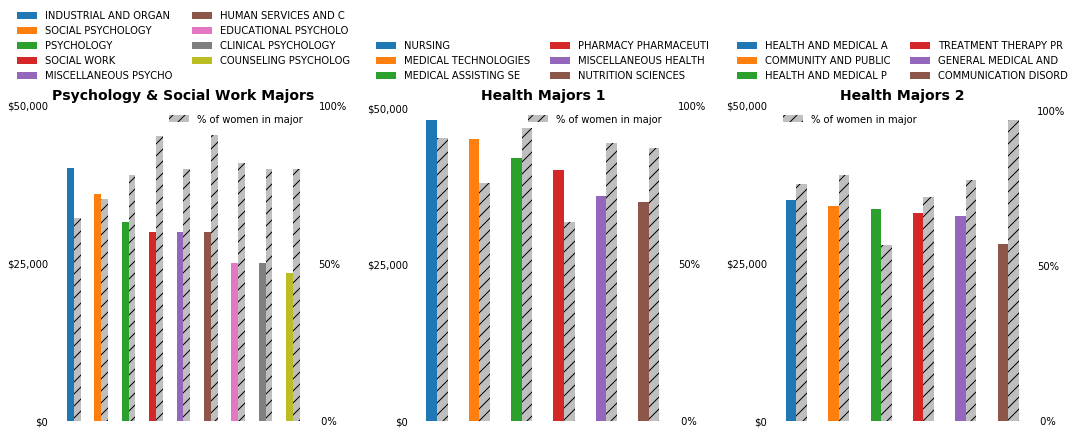

In [8]:
# Psychology and social work majors

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
ax2 = ax.twinx()

categ_majors_psy = major_earnings[major_earnings["Major_category"] == "Psychology & Social Work"]

ax, ax2 = ax_settings(ax, ax2, categ_majors_psy, "Psychology & Social Work Majors", 50000)
    
# Health majors

for sp in range(1, 3):
    ax = fig.add_subplot(1,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 1:
        categ_majors_health = major_earnings[major_earnings["Major_category"] == "Health"][:6]
    else:
        categ_majors_health = major_earnings[major_earnings["Major_category"] == "Health"][6:]
    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_health, "Health Majors " + str(sp), 50000)


fig.tight_layout(w_pad = 2.0, h_pad = 10.0)
plt.show()

The plots indicate that there is a high percentage of women in most health-related professions. In some of them, such as nursing, very high.

#### 3.4 Other categories

Here is a plot of Business, Law, Agriculture, Education, and Industrial Arts majors.

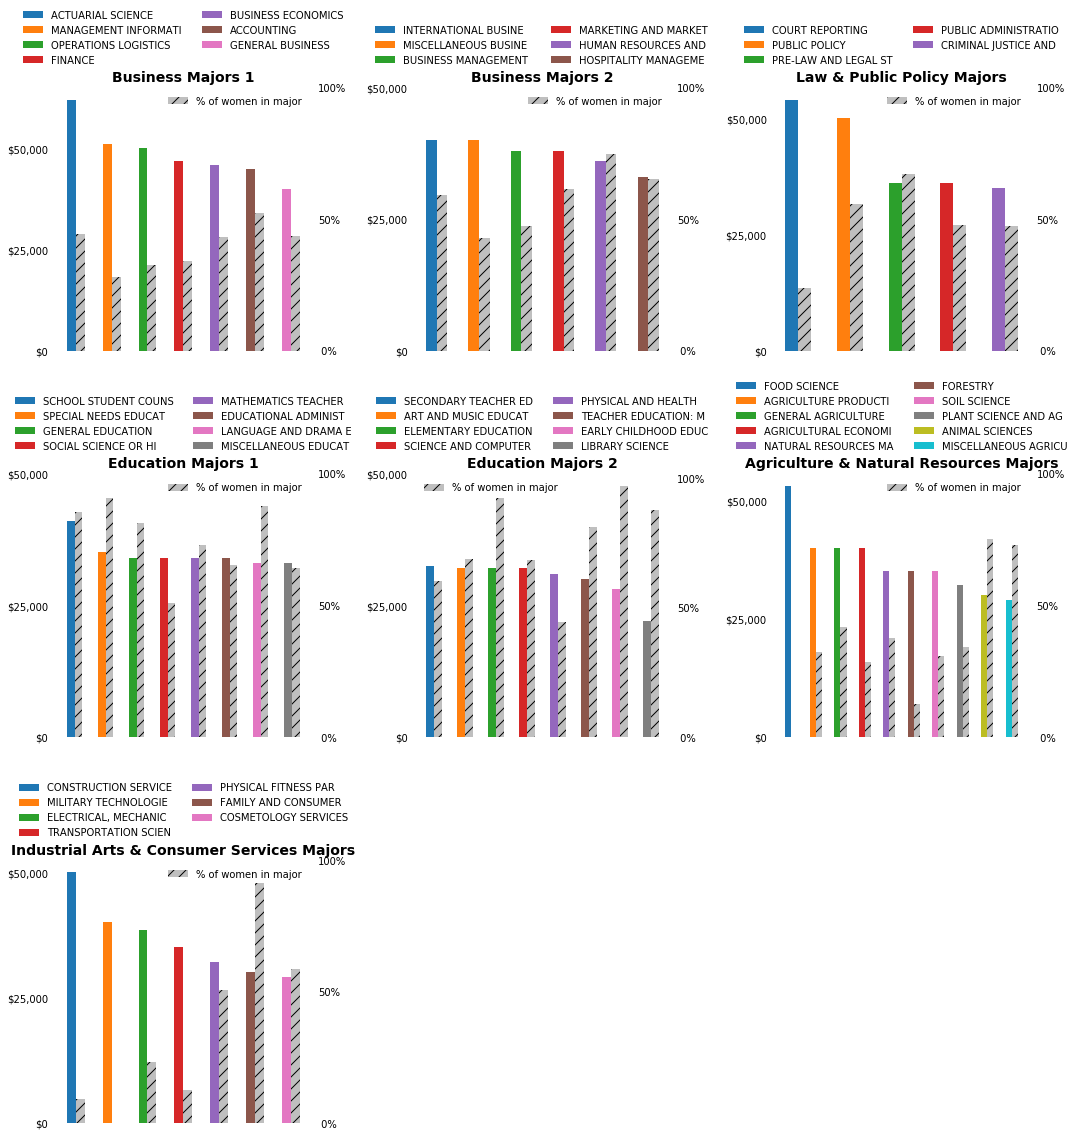

In [9]:
fig = plt.figure(figsize=(15,15))

# Business majors

for sp in range(0, 2):
    ax = fig.add_subplot(3,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 0:
        categ_majors_bus = major_earnings[major_earnings["Major_category"] == "Business"][:7]
    else:
        categ_majors_bus = major_earnings[major_earnings["Major_category"] == "Business"][7:]

    
    ax, ax2 = ax_settings(ax, ax2, categ_majors_bus, "Business Majors " + str(sp + 1), 50000)
    
# Law majors

ax = fig.add_subplot(3,3,3)
ax2 = ax.twinx()

categ_majors_law = major_earnings[major_earnings["Major_category"] == "Law & Public Policy"]

ax, ax2 = ax_settings(ax, ax2, categ_majors_law, "Law & Public Policy Majors", 50000)

# Education majors

for sp in range(3, 5):
    ax = fig.add_subplot(3,3,sp+1)
    ax2 = ax.twinx()
    
    if sp == 3:
        categ_majors_edu = major_earnings[major_earnings["Major_category"] == "Education"][:8]
    else:
        categ_majors_edu = major_earnings[major_earnings["Major_category"] == "Education"][8:]
        
    ax, ax2 = ax_settings(ax, ax2, categ_majors_edu, "Education Majors " + str(sp - 2), 50000)

# Agriculture majors

ax = fig.add_subplot(3,3,6)
ax2 = ax.twinx()

categ_majors_agri = major_earnings[major_earnings["Major_category"] == "Agriculture & Natural Resources"]

ax, ax2 = ax_settings(ax, ax2, categ_majors_agri, "Agriculture & Natural Resources Majors", 50000)

# Industrial Arts majors

ax = fig.add_subplot(3,3,7)
ax2 = ax.twinx()

categ_majors_indarts = major_earnings[major_earnings["Major_category"] == "Industrial Arts & Consumer Services"]

ax, ax2 = ax_settings(ax, ax2, categ_majors_indarts, "Industrial Arts & Consumer Services Majors", 50000)
    
fig.tight_layout(w_pad = 2.0, h_pad = 10.0)
plt.show()

Business majors are a mixed bag. Women are highly represented in some majors such as human resources and marketing, but are underrepresented in others such as logistics. Women have achieved a high rate of representation in just about every law major except court reporting, and in education, there is only one major in which the share of women is below 50%. In education, women have higher rates of participation in most majors, whereas in agriculture women have low rates of participation in 8 out of 10 majors.

### 4.0 Summary

Women have a high or very high share of certain major categories, such as health and education majors, but a very small portion of others that are typically in high demand and have higher earning potential, such as engineering and computer-related majors. In many major categories, the top earning profession has a low share of women in its ranks.

### 5.0 References

1. Dataquest. [***Exploratory Data Visualization***](https://www.dataquest.io/course/exploratory-data-visualization).

2. Casselman, Ben. [***Data and code for FiveThirtyEight's story on earnings of college majors***](https://github.com/fivethirtyeight/data/tree/master/college-majors).

3. tim and Ffisegydd. [***Pandas: Bar-Plot with two bars and two y-axis***](https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis). June 2014.

4. pemistahl and EOL. [***How can I add textures to my bars and wedges?***](https://stackoverflow.com/questions/14279344/how-can-i-add-textures-to-my-bars-and-wedges). January 2013.

5. Chris and Jianxun Li. [***Format y axis as percent***](https://stackoverflow.com/questions/31357611/format-y-axis-as-percent). July 2015.